In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/suriya/dcu/Group-Project


In [3]:
import os

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

import seaborn as sns

In [5]:
test_key = pd.read_csv('data/tc4tl_test_key/tc4tl/docs/tc4tl_test_key.tsv', sep='\t')
test_data_dir = 'data/tc4tl_data_v5/tc4tl/data/test/'
train_key = pd.read_csv('data/tc4tl_training_data_v1/tc4tl/docs/tc4tl_train_key.tsv', sep='\t')
train_data_dir = 'data/tc4tl_training_data_v1/tc4tl/data/train/'
dev_key = pd.read_csv('data/tc4tl_data_v5/tc4tl/docs/tc4tl_dev_key.tsv', sep='\t')
dev_data_dir = 'data/tc4tl_data_v5/tc4tl/data/dev/'

## Hint 1: Summary Statistics Help

mean, trimmed mean, median, first and third quartiles, minimum, maximum, standard deviation, range, interquartile range, L1 distance to the mean, L1 distance to the median, kurtosis, skewness, and the count of different values describing the series

In [ ]:
from src.features.common import read_chirp_sequence_from_file

In [ ]:
fp = os.path.join(train_data_dir, os.listdir(train_data_dir)[0])
chirp_seq = read_chirp_sequence_from_file(fp)
[ len(c) for c in chirp_seq ]

In [ ]:
from scipy.stats import trim_mean
fn = lambda x : trim_mean(x, 0.25)

trimmed_mean = [ fn(c.rssi) for c in chirp_seq ]
_mean = [ c.rssi.mean() for c in chirp_seq ]
_median = [ c.rssi.median() for c in chirp_seq ]
q1 = [ c.rssi.quantile(0.25) for c in chirp_seq ]
q3 = [ c.rssi.quantile(0.75) for c in chirp_seq ]
_min = [ c.rssi.min() for c in chirp_seq ]
_max = [ c.rssi.max() for c in chirp_seq ]
_std = [ c.rssi.std() for c in chirp_seq ]

plt.figure(figsize=(12, 8))
plt.scatter(list(range(len(chirp_seq))), _mean, c='red', s=80, alpha=0.5, label='Mean');
plt.plot(list(range(len(chirp_seq))), _mean, c='red', lw=0.5);
plt.scatter(list(range(len(chirp_seq))), trimmed_mean, c='green', s=80, alpha=0.5, label='Trimmed Mean');
plt.plot(list(range(len(chirp_seq))), trimmed_mean, c='green', lw=0.5);
plt.scatter(list(range(len(chirp_seq))), _median, c='blue', s=80, alpha=0.5, label='Median');
plt.plot(list(range(len(chirp_seq))), _median, c='blue', lw=0.5);
plt.scatter(list(range(len(chirp_seq))), q1, c='indigo', s=80, alpha=0.5, label='Q1');
plt.plot(list(range(len(chirp_seq))), q1, c='indigo', lw=0.5);
plt.scatter(list(range(len(chirp_seq))), q3, c='hotpink', s=80, alpha=0.5, label='Q3');
plt.plot(list(range(len(chirp_seq))), q3, c='hotpink', lw=0.5);
plt.scatter(list(range(len(chirp_seq))), _min, c='peru', s=80, alpha=0.5, label='Min');
plt.plot(list(range(len(chirp_seq))), _min, c='peru', lw=0.5);
plt.scatter(list(range(len(chirp_seq))), _max, c='slategray', s=80, alpha=0.5, label='Max');
plt.plot(list(range(len(chirp_seq))), _max, c='slategray', lw=0.5);

plt.legend();

In [ ]:
iqr = np.array(q3) - np.array(q1)
_kurtosis = [ c.rssi.kurtosis() for c in chirp_seq ]
_skew = [ c.rssi.skew() for c in chirp_seq ]

plt.figure(figsize=(12, 8))
plt.scatter(list(range(len(chirp_seq))), _std, c='olive', s=80, alpha=0.5, label='Standard Deviation');
plt.plot(list(range(len(chirp_seq))), _std, c='olive', lw=0.5);
plt.scatter(list(range(len(chirp_seq))), iqr, c='lightsteelblue', s=80, alpha=0.99, label='IQR');
plt.plot(list(range(len(chirp_seq))), iqr, c='lightsteelblue', lw=0.8);
plt.scatter(list(range(len(chirp_seq))), _kurtosis, c='darkslategray', s=80, alpha=0.5, label='Kurtosis');
plt.plot(list(range(len(chirp_seq))), _kurtosis, c='darkslategray', lw=0.8);
plt.scatter(list(range(len(chirp_seq))), _skew, c='darkorchid', s=80, alpha=0.5, label='Skewness');
plt.plot(list(range(len(chirp_seq))), _skew, c='darkorchid', lw=0.8);

plt.legend();

In [ ]:
rssi_values = pd.concat([c.rssi for c in chirp_seq], axis=0).values
tunable_bin_size = 3
bins = np.arange(-80, -40, tunable_bin_size)
counts, _ = np.histogram(rssi_values, bins=bins, density=True)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(10, 5))
plt.bar(center, counts, align='center', width=width, color='yellowgreen');
plt.xlabel('RSSI');

## Feature Correlation

In [6]:
from src.featutils import aggregate_features_from_folder
from src.features.ram2021 import extract_features, postproc
from src.features.common import get_predictors_default, TARGET

In [38]:
devset, encoders = aggregate_features_from_folder(dev_data_dir, dev_key, feat_fn=extract_features, postproc_fn=postproc)

100%|██████████| 935/935 [00:07<00:00, 126.67it/s]


In [39]:
devset.isna().sum()

Distance           0
CoarseGrain        0
fileid             0
TrimmedMean_0      0
TrimmedMean_1     82
TrimmedMean_2    273
Mean_0             0
Mean_1            82
Mean_2           273
Median_0           0
Median_1          82
Median_2         273
Q1_0               0
Q1_1              82
Q1_2             273
Q3_0               0
Q3_1              82
Q3_2             273
Min_0              0
Min_1             82
Min_2            273
Max_0              0
Max_1             82
Max_2            273
Std_0              0
Std_1             82
Std_2            273
Iqr_0              0
Iqr_1             82
Iqr_2            273
Kurtosis_0         0
Kurtosis_1        82
Kurtosis_2       273
Skew_0             0
Skew_1            82
Skew_2           273
Hist_78.5          1
Hist_75.5          1
Hist_72.5          1
Hist_69.5          1
Hist_66.5          1
Hist_63.5          1
Hist_60.5          1
Hist_57.5          1
Hist_54.5          1
Hist_51.5          1
Hist_48.5          1
Hist_45.5    

In [40]:
devset = devset.fillna(0.)

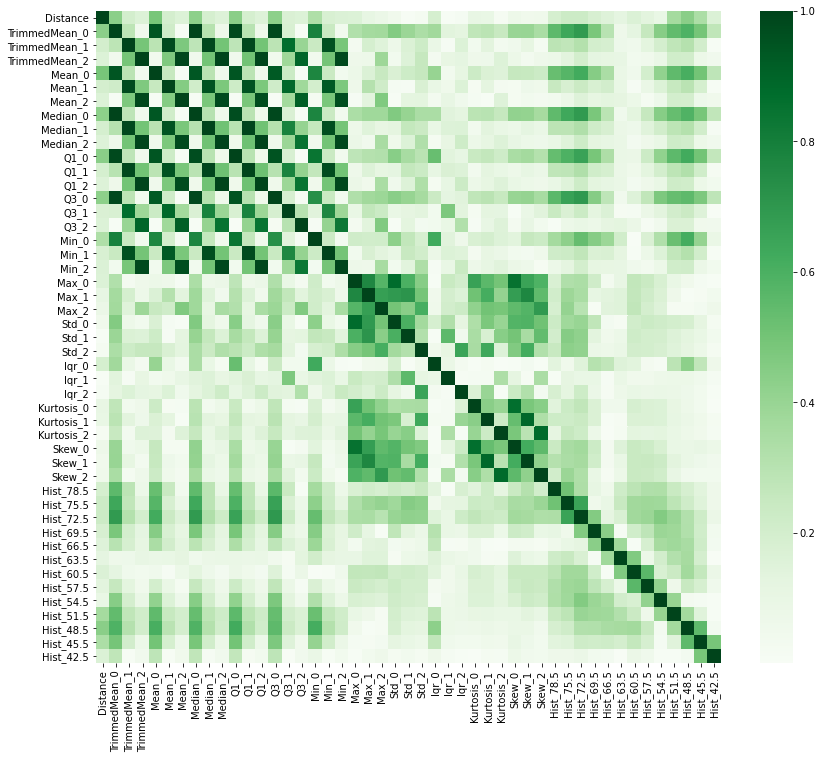

In [61]:
devset["Distance"] = devset.Distance.astype(float)
corr = devset.corr().abs()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='Greens');

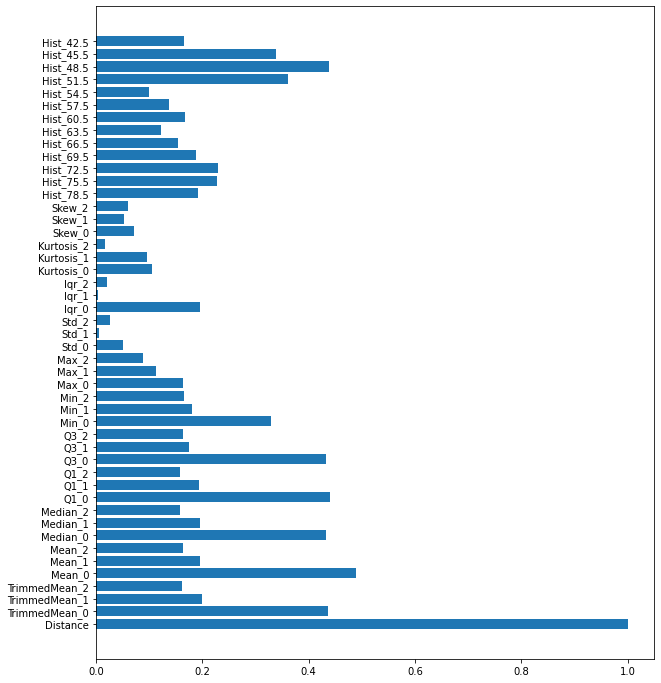

In [59]:
plt.figure(figsize=(10, 12))
plt.barh(corr['Distance'].index, corr['Distance']);

In [78]:
_devset['Distance'] = _devset.Distance.astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
PREDICTORS = get_predictors_default(devset)
_devset = devset[PREDICTORS + [TARGET]]

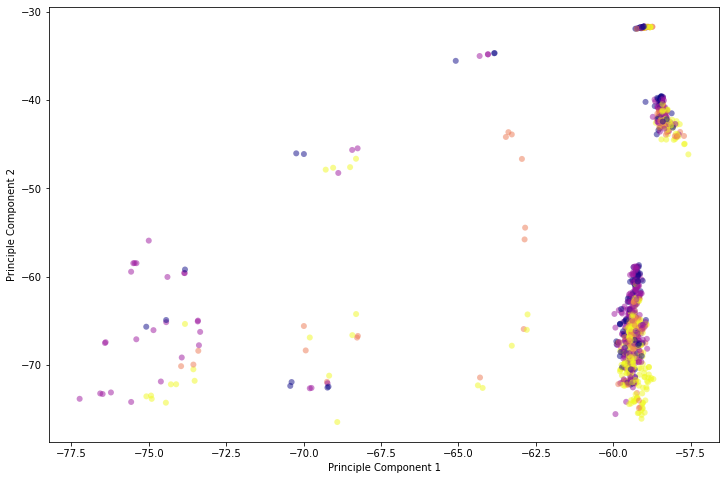

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(_devset)
dev_pca = pca.transform(_devset)
dev_new = pca.inverse_transform(dev_pca)
plt.figure(figsize=(12, 8))
labels = _devset.Distance.replace({
    '1.2' : 0,
    '1.8' : 1,
    '3.0' : 2,
    '4.5' : 3
}).values
plt.scatter(dev_new[:, 0], dev_new[:, 1], alpha=0.5, edgecolor='none', c=labels, cmap='plasma');
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2');